## IMPORT

In [1]:
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display_html
import numpy as np
import datetime as dt
import plotly.graph_objects as go

## PATH

In [2]:
ROOT = Path.cwd().parent

data_path = ROOT / 'data'

## READ DATA

In [3]:
df = pd.read_csv(data_path / 'Standard Report - Imports.csv')
df = df.iloc[:, :3]
df['export_value'] = df['export_value'].str.replace(',', '').astype(int)
df['Time'] = pd.to_datetime(df['Time']).dt.date

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_29752\1388780750.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.date


In [4]:
df2 = pd.pivot(df, index='Time', columns='Country', values='export_value')
# df2.index = pd.to_datetime(df2.index.str.strip(), format = 'mixed').date

In [5]:
df2.isna().sum()

Country
APEC - Asia Pacific Economic Co-operation           0
ASEAN - Association of Southeast Asian Nations      0
Africa                                             29
Albania                                           238
Andorra                                           239
                                                 ... 
United Arab Emirates                              170
United Kingdom                                      0
Uruguay                                           238
Venezuela                                         237
Vietnam                                            92
Length: 186, dtype: int64

In [6]:
df2.loc[df2['Vietnam'].isna()]

Country,APEC - Asia Pacific Economic Co-operation,ASEAN - Association of Southeast Asian Nations,Africa,Albania,Andorra,Antigua and Barbuda,Argentina,Armenia,Asia,Australia,...,Turks and Caicos Islands,Twenty Latin American Republics,US Trade Agreements Partners,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Venezuela,Vietnam
Time,,,,,,,,,,,,,,,,,,,,,
2002-01-01,51441468.0,16552392.0,3958.0,NaN,NaN,NaN,NaN,NaN,43643679.0,718276.0,...,NaN,6504829.0,12447954.0,NaN,NaN,NaN,1267226.0,NaN,NaN,NaN
2002-02-01,54831260.0,14467482.0,3000.0,NaN,NaN,NaN,4000.0,NaN,46439460.0,196732.0,...,NaN,7661671.0,13182790.0,NaN,NaN,NaN,1473030.0,NaN,NaN,NaN
2002-03-01,68067040.0,21142523.0,17344.0,NaN,NaN,NaN,NaN,NaN,56138366.0,1067101.0,...,NaN,8482007.0,16067221.0,NaN,NaN,NaN,2156392.0,NaN,NaN,NaN
2002-04-01,82342197.0,22931002.0,2500.0,NaN,NaN,NaN,19500.0,NaN,70829355.0,677377.0,...,NaN,8079599.0,16693668.0,NaN,NaN,NaN,4590690.0,NaN,NaN,NaN
2002-05-01,104939726.0,48883775.0,9333.0,NaN,NaN,NaN,NaN,NaN,92194599.0,698001.0,...,NaN,10476344.0,19269622.0,NaN,NaN,NaN,1745696.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-01,307122973.0,51142854.0,166421.0,NaN,NaN,NaN,26450.0,NaN,262755044.0,109186.0,...,NaN,44932645.0,56616870.0,NaN,NaN,NaN,1878652.0,NaN,NaN,NaN
2010-10-01,361505256.0,57162069.0,18550.0,NaN,NaN,NaN,69040.0,NaN,312145197.0,39612.0,...,NaN,52026992.0,78174052.0,NaN,NaN,NaN,2320168.0,NaN,NaN,NaN
2010-12-01,454622436.0,49250859.0,100313.0,NaN,NaN,NaN,37962.0,NaN,407564883.0,81171.0,...,NaN,59648614.0,87066862.0,NaN,34800.0,NaN,2468117.0,NaN,NaN,NaN


In [7]:
df2['china'] = df2[['China', 'Hong Kong']].sum(axis=1)
df2['europe'] = df2[['France', 'Germany', 'Italy', 'Netherlands']].sum(axis=1)
df2['jp_kr'] = df2[['Japan', 'Korea, South']].sum(axis=1)
df2['SEA'] = df2[['Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']].sum(axis=1)
df2['taiwan'] = df2['Taiwan']

In [8]:
['China', 'Hong Kong', 'France', 'Germany', 'Italy', 'Netherlands', 'Japan', 'Korea, South', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'Taiwan']

['China',
 'Hong Kong',
 'France',
 'Germany',
 'Italy',
 'Netherlands',
 'Japan',
 'Korea, South',
 'Malaysia',
 'Philippines',
 'Singapore',
 'Thailand',
 'Vietnam',
 'Taiwan']

In [9]:
df2

Country,APEC - Asia Pacific Economic Co-operation,ASEAN - Association of Southeast Asian Nations,Africa,Albania,Andorra,Antigua and Barbuda,Argentina,Armenia,Asia,Australia,...,United Arab Emirates,United Kingdom,Uruguay,Venezuela,Vietnam,china,europe,jp_kr,SEA,taiwan
Time,,,,,,,,,,,,,,,,,,,,,
2002-01-01,51441468.0,16552392.0,3958.0,NaN,NaN,NaN,NaN,NaN,43643679.0,718276.0,...,NaN,1267226.0,NaN,NaN,NaN,5168136.0,4768110.0,17849737.0,16502588.0,2561955.0
2002-02-01,54831260.0,14467482.0,3000.0,NaN,NaN,NaN,4000.0,NaN,46439460.0,196732.0,...,NaN,1473030.0,NaN,NaN,NaN,4674229.0,5333185.0,22703722.0,14369656.0,2892684.0
2002-03-01,68067040.0,21142523.0,17344.0,NaN,NaN,NaN,NaN,NaN,56138366.0,1067101.0,...,NaN,2156392.0,NaN,NaN,NaN,6477891.0,5050236.0,24427001.0,21018836.0,3163719.0
2002-04-01,82342197.0,22931002.0,2500.0,NaN,NaN,NaN,19500.0,NaN,70829355.0,677377.0,...,NaN,4590690.0,NaN,NaN,NaN,9047393.0,3960495.0,34258897.0,22732596.0,3255129.0
2002-05-01,104939726.0,48883775.0,9333.0,NaN,NaN,NaN,NaN,NaN,92194599.0,698001.0,...,NaN,1745696.0,NaN,NaN,NaN,10470126.0,4568383.0,27449010.0,48689785.0,3205019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,588078665.0,416225576.0,23537.0,NaN,NaN,NaN,NaN,NaN,626504493.0,92846.0,...,43410.0,3095675.0,NaN,NaN,128216477.0,38106161.0,36273772.0,125052841.0,386798741.0,25443088.0
2021-09-01,597159540.0,433333495.0,58839.0,NaN,NaN,NaN,NaN,NaN,623124925.0,489074.0,...,NaN,2487602.0,NaN,NaN,148667341.0,34641335.0,34572792.0,110097060.0,410620139.0,28682673.0
2021-10-01,744753162.0,595413446.0,11364.0,NaN,NaN,NaN,NaN,160284.0,766946032.0,487946.0,...,9808.0,2655156.0,NaN,NaN,211835487.0,29293374.0,30956576.0,104110672.0,571343982.0,26792630.0


In [10]:
df_norm = df2[['china', 'europe', 'jp_kr', 'SEA', 'taiwan']].copy()

In [11]:
df_norm['total'] = df_norm[['china', 'europe', 'jp_kr', 'SEA', 'taiwan']].sum(axis = 1)

In [12]:
df_norm['total']

Time
2002-01-01     46850526.0
2002-02-01     49973476.0
2002-03-01     60137683.0
2002-04-01     73254510.0
2002-05-01     94382323.0
                 ...     
2021-08-01    611674603.0
2021-09-01    618613999.0
2021-10-01    762497234.0
2021-11-01    616785515.0
2021-12-01    570565479.0
Name: total, Length: 240, dtype: float64

In [13]:
df_norm[['china', 'europe', 'jp_kr', 'SEA', 'taiwan']]

Country,china,europe,jp_kr,SEA,taiwan
Time,,,,,
2002-01-01,5168136.0,4768110.0,17849737.0,16502588.0,2561955.0
2002-02-01,4674229.0,5333185.0,22703722.0,14369656.0,2892684.0
2002-03-01,6477891.0,5050236.0,24427001.0,21018836.0,3163719.0
2002-04-01,9047393.0,3960495.0,34258897.0,22732596.0,3255129.0
2002-05-01,10470126.0,4568383.0,27449010.0,48689785.0,3205019.0
...,...,...,...,...,...
2021-08-01,38106161.0,36273772.0,125052841.0,386798741.0,25443088.0
2021-09-01,34641335.0,34572792.0,110097060.0,410620139.0,28682673.0
2021-10-01,29293374.0,30956576.0,104110672.0,571343982.0,26792630.0


In [14]:
df_norm['china'] = df_norm['china'] / df_norm['total']
df_norm['europe'] = df_norm['europe'] / df_norm['total']
df_norm['jp_kr'] = df_norm['jp_kr'] / df_norm['total']
df_norm['SEA'] = df_norm['SEA'] / df_norm['total']
df_norm['taiwan'] = df_norm['taiwan'] / df_norm['total']

<Axes: xlabel='Time'>

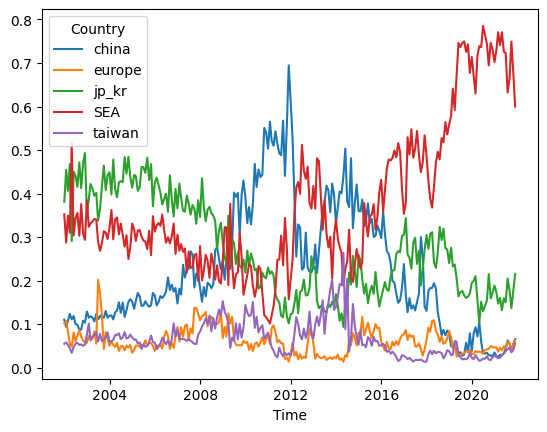

In [15]:
df_norm[['china', 'europe', 'jp_kr', 'SEA', 'taiwan']].plot()

<Axes: xlabel='Time'>

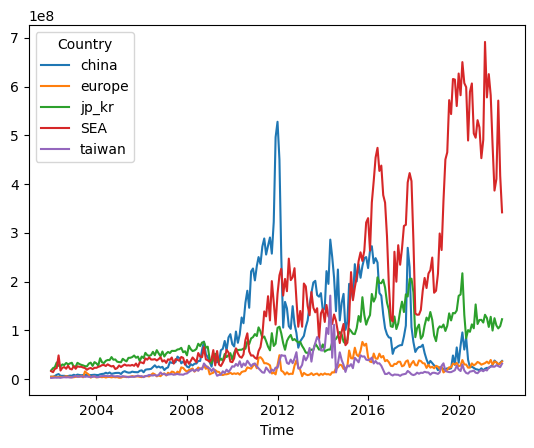

In [16]:
df2[['china', 'europe', 'jp_kr', 'SEA', 'taiwan']].plot()

In [17]:
export_data = df2[['china', 'europe', 'jp_kr', 'SEA', 'taiwan']]

In [29]:
import plotly.graph_objects as go

def plot_regions(df, start_date=None, end_date=None):
    """
    Plots selected regions using Plotly Graph Objects with optional date filtering.

    Parameters:
    - df: pandas DataFrame with a DatetimeIndex and columns: 'china', 'europe', 'jp_kr', 'SEA', 'taiwan'
    - start_date: string or pd.Timestamp (optional)
    - end_date: string or pd.Timestamp (optional)
    """
    # Filter by date if specified
    if start_date is not None:
        df = df[df.index >= pd.to_datetime(start_date).date()]
    if end_date is not None:
        df = df[df.index <= pd.to_datetime(end_date).date()]

    # Create figure
    fig = go.Figure()

    for col in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df[col], name=col, mode='lines+markers'))

    fig.update_layout(
        title=f'Monthly Exports by Region',
        xaxis_title='Date',
        yaxis_title='Export Value (USD)',
        width=1000,
        height=600,
        legend_title='Region',
        hovermode='x unified'
    )

    fig.show()


In [23]:
# plot_regions(df2[['China', 'Hong Kong', 'France', 'Germany', 'Italy', 'Netherlands', 'Japan', 'Korea, South', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'Taiwan']], '2010-01-01', '2020-01-01')

In [24]:
export_data.index

Index([2002-01-01, 2002-02-01, 2002-03-01, 2002-04-01, 2002-05-01, 2002-06-01,
       2002-07-01, 2002-08-01, 2002-09-01, 2002-10-01,
       ...
       2021-03-01, 2021-04-01, 2021-05-01, 2021-06-01, 2021-07-01, 2021-08-01,
       2021-09-01, 2021-10-01, 2021-11-01, 2021-12-01],
      dtype='object', name='Time', length=240)

In [30]:
plot_regions(df2[['china', 'europe', 'jp_kr', 'SEA', 'taiwan']], '2010-01-01', '2020-12-01')

## EXPORT

In [26]:
# df_norm.to_csv(data_path / 'dati_leo_normalizzati.csv')
# df2[['china', 'europe', 'jp_kr', 'SEA', 'taiwan']].to_csv(data_path / 'dati_leo_assoluti.csv')